# 1. Equação Analítica aproximada da Magnetização

*Baseado no exercício 1.5 Fitzgerald- Máquinas Elétricas - 6°ed*

Quando consideramos o comportamento real da um núcleo magnético, a permeabilidade não é linear, deste modo há uma 
dependência do valor da indução magnética dada caracteristicamente como exemplo pela função:

$$\mu_r(B_m)=\mu_0 \bigg (1+\frac{3499}{\sqrt{1+0.047.(B_m)^{7.8}}} \bigg)$$

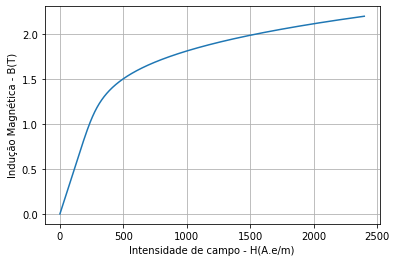

In [1]:
from sympy import *
%matplotlib inline

u0,g,ac,n,lc=symbols('mu_0, g, A_c,N,l_c')

def mu(bm):
    return u0*(1+(3499)/((1+0.047*(bm**7.8))**.5))

i=symbols('i')

i=1.5

def hc(bm):
    return bm/mu(bm)
    
import numpy as np

b=np.linspace(0,2.2,1000)

u0,g,ac,n=4*np.pi*(1e-7),2.3*1e-3,1.8*1e-3,83

h=hc(b)

import matplotlib.pyplot as plt

plt.subplot(xlabel='Intensidade de campo - H(A.e/m)', ylabel='Indução Magnética - B(T)')
plt.plot(h,b)
plt.grid()

# 2. Análise Numérica da Curva de Magnetização

*Baseado no exercício 1.29 Fitzgerald- Máquinas Elétricas - 6°ed*

Por um levantamento de dados da magnetização de um núcleo magnético, o fabricante pode chegar a seguinte configuração:

In [7]:
import pandas as pd
pd.read_excel('1.29 - Data.xlsx')

,i,B,H
0,1,0.00,48
1,2,0.20,52
2,3,0.40,58
3,4,0.60,73
4,5,0.70,85
5,6,0.80,103
6,7,0.90,135
7,8,1.00,193
8,9,0.95,80
9,10,0.90,42


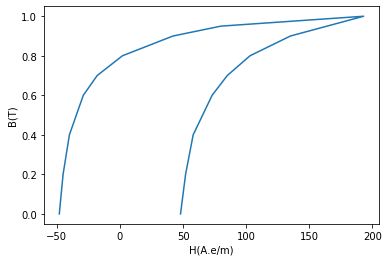

In [13]:
import matplotlib.pyplot as plt

b,h=tabela['B'],tabela['H']
plt.subplot(xlabel='H(A.e/m)', ylabel='B(T)')
plt.plot(h,b)
plt.show()

Essa é a curva característica de um núcleo ferromagnético, a energia armazenda é dada pela área da curva.

Para o cálculo de sua energia armazenada podemos utilizar um método numérico de integração,

um dos algoritmos para conseguir a área é pelo métodos da soma de trapézios, que para o problema em específico reduz-se a:

$A_t = \displaystyle\sum_{n=0}^{n=N-1}\bigg|\frac{(y_{i+1}-y_i)\cdot(x_{i+1}-x_i)}{2} \bigg| + |y_i.(x_{i+1}-x_i)|$ 

onde N=16 no exemplo

O código abaixo está sintetizado por diferenças regressivas, mas obedece a mesma ideia da equação acima pela diminuição progressiva.

In [95]:
def trapezios(v_x,v_y,ai=[]):
    #Em teoria, tamanho de v_x é o mesmo de v_y
    if len(v_x)==len(v_y):
        for i in range(1,len(v_x)):
            if v_x[i]>v_x[i-1]:
                ai.append(abs(((v_y[i]-v_y[i-1])*(v_x[i]-v_x[i-1]))/2)+abs(v_y[i-1]*(v_x[i]-v_x[i-1])))
            else:
                ai.append(abs(((v_y[i]-v_y[i-1])*(v_x[i]-v_x[i-1]))/2)+abs(v_y[i]*(v_x[i]-v_x[i-1])))
        return ai
    else:
        print("Erro, tamanhos dos vetores são Diferentes")
    

ai=trapezios(vh,vb)

ai#Áreas dos Trapézios

[0.4,
 1.8000000000000003,
 7.5,
 7.799999999999999,
 13.5,
 27.200000000000003,
 55.1,
 110.175,
 35.15,
 34.0,
 15.0,
 7.1499999999999995,
 5.5,
 1.5,
 0.30000000000000004]

Cabe observar que a partir da posição 6, as áreas começam a se sobrepor, ou seja, saímos do ponto de saturação máximo para um menor, deste modo estamos considerando uma redundância se tomarmos o somatório do vetor de áreas encontrado, então faz sentido considerar que:


$A_{curva}=\sum_{i=6}^{15}A_i - \sum_{i=0}^{5}A_i $

In [99]:
a_curva=sum(ai[6:])-sum(ai[:6])
a_curva

205.675

Sendo assim, a energia armazenada no imã é de aproximadamente: $W \cong 205J$


# 3.Variação da indutância com a permeabilidade relativa

*Baseado no ex. 1.11 do capítulo 1,  Fitzgerald - Máquinas elétricas 6° ed*

Pelo circuito magnético da figura abaixo, derivamos algumas equações:

![](imgs/im1-11.png)

O comprimento médio de seu núcleo magnético é dado por:

$$[1.1]: l_c=\pi.(R_e+R_i) - g$$

Se a altura do ferro for $h$, temos que sua área pode ser expressa por:

$$[1.2]: A_c = h.(R_e - R_i)$$

O que por consequência nos fornece uma relutância do ferro de:

$$[1.3]: \Re_c = \frac{\pi.(R_e+R_i)-g}{\mu_c.(R_e-R_i).h}$$


Já a relutância de entreferro fica representada como:

$$[1.4]: \Re_g = \frac{g}{\mu_0.(R_e-R_i).h}$$


Se desprezarmos os efeitos de espraiamento,considerando que:
$$[1.5]: \phi_c=\phi_g$$

Ao aplicarmos o análogo magnético da LKT no circuito teremos:

$$[1.6]: \Im = \phi_c.(\Re_c+\Re_g)$$

ou 

$$[1.6.1]: \phi_c=\frac{\Im}{\Re_c+\Re_g}$$

Substituindo $[1.6.1]$ em $[1.5]$, teremos após expansão algébrica:

$$[1.5.1]: \phi_c = \frac{A_c.\mu_c.N.i}{g.\mu_r+l_c} $$

em que : $i=\frac{\Im}{N}$

Pela definição de fluxo concatenado temos:
$$[1.7]: \lambda=N.\phi$$


E pela definição de indutância própria:

$$[1.8]: L = \frac{\lambda}{i}$$


De modo  que ao substituirmos $[1.5.1]$ em $[1.8]$ e em sequência em $[1.9]$, teremos uma indutância própria dada por:

$$[1.8.1]:L(\mu_r)=\cfrac{N^2.A_c.\mu_0}{l_c+g.\mu_r}$$


onde $\mu_r=\frac{\mu_c}{\mu_0}$.

Para dados valores raio externo $4.0\,cm$, raio internor $3.4\,  cm$, $h=2\,cm$ , entreferro de $0.2\,cm$ e número de espiras correspondente a $65$, teremos:

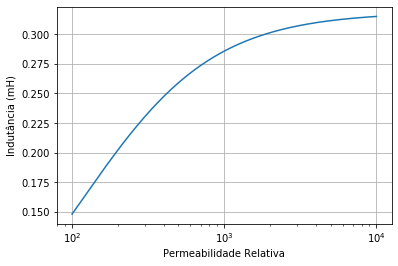

In [12]:
from sympy import *

ac,u, lc, g, n =symbols('A_c, mu, l_c, g, N')

ac=2*1e-2*(0.6)*1e-2

from math import pi

lc=pi*(3.4+4.0)*1e-2 - 0.2*1e-2

def L(ur):
    return (n**2*ac*ur*(4*pi*1e-7))/(lc+g*(ur))
    
import numpy as np

v_ur=np.logspace(2,4,1000)

import matplotlib.pyplot as plt

n=65

g,h=0.2*1e-2,2*1e-2

plt.subplot(xlabel='Permeabilidade Relativa', ylabel='Indutância (mH)', xscale='log')
plt.plot(v_ur,L(v_ur)*1e3)
plt.grid()
plt.show()